Tetuan City Power Consumption: Feature Engineering & Deep Learning Prep - week 2

In [21]:
# Tetuan City Power Consumption: Neural Network Design & Baseline Training

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

In [22]:
# --- 1. Data Loading and Initial Cleaning ---
try:
    df = pd.read_csv('Tetuan City power consumption.csv')
except FileNotFoundError:
    print("Error: 'Tetuan City power consumption.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Clean column names and set DateTime index
df.columns = df.columns.str.strip().str.replace(' ', '_')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

print("--- Data Loading and Initial Cleaning Complete ---")
print("\n" + "="*80 + "\n")

--- Data Loading and Initial Cleaning Complete ---




In [23]:
# --- 2. Feature Selection and Cyclical Feature Engineering ---
features_to_use = [
    'Temperature',
    'Humidity',
    'general_diffuse_flows', 'Wind_Speed',
    'Zone_1_Power_Consumption', 'Zone_2__Power_Consumption', 'Zone_3__Power_Consumption'
]
data = df[features_to_use].copy()

# Engineer cyclical features for time, which helps neural networks understand time's cyclical nature
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek

# Sine/Cosine Transformation for 'hour'
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24.0)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24.0)

# Sine/Cosine Transformation for 'dayofweek'
data['dayofweek_sin'] = np.sin(2 * np.pi * data['dayofweek'] / 7.0)
data['dayofweek_cos'] = np.cos(2 * np.pi * data['dayofweek'] / 7.0)

# # Drop original time features
# data = data.drop(columns=['hour', 'dayofweek'])

print("--- Feature Engineering Complete ---")
print("Cyclical features (sin/cos) created for 'hour' and 'dayofweek'.")
print(data.head())
print("\n" + "="*80 + "\n")

--- Feature Engineering Complete ---
Cyclical features (sin/cos) created for 'hour' and 'dayofweek'.
                     Temperature  Humidity  general_diffuse_flows  Wind_Speed  \
DateTime                                                                        
2017-01-01 00:00:00        6.559      73.8                  0.051       0.083   
2017-01-01 00:10:00        6.414      74.5                  0.070       0.083   
2017-01-01 00:20:00        6.313      74.5                  0.062       0.080   
2017-01-01 00:30:00        6.121      75.0                  0.091       0.083   
2017-01-01 00:40:00        5.921      75.7                  0.048       0.081   

                     Zone_1_Power_Consumption  Zone_2__Power_Consumption  \
DateTime                                                                   
2017-01-01 00:00:00               34055.69620                16128.87538   
2017-01-01 00:10:00               29814.68354                19375.07599   
2017-01-01 00:20:00        

In [24]:
# --- 3. Data Splitting (Train, Validation, Test) ---
# For time series, splitting must be chronological.
# 70% for training, 15% for validation, 15% for testing.
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.15)

train_df = data.iloc[:train_size]
val_df = data.iloc[train_size:train_size + val_size]
test_df = data.iloc[train_size + val_size:]

print("--- Data Splitting Complete ---")
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")
print("\n" + "="*80 + "\n")

--- Data Splitting Complete ---
Training set shape: (36691, 13)
Validation set shape: (7862, 13)
Test set shape: (7863, 13)




In [25]:
# --- 4. Feature Scaling ---
# Scale all features to a [0, 1] range.
# FIT the scaler ONLY on the training data to prevent data leakage.
scaler = MinMaxScaler()
# Fit on training data and transform all sets
scaler.fit(train_df)
train_scaled = scaler.fit_transform(train_df)
val_scaled = scaler.transform(val_df)
test_scaled = scaler.transform(test_df)

print("--- Feature Scaling Complete ---")
print("All features scaled using MinMaxScaler, fit only on the training data.")
print("\n" + "="*80 + "\n")

--- Feature Scaling Complete ---
All features scaled using MinMaxScaler, fit only on the training data.





--- Processing Zone 1 (Target: Zone_1_Power_Consumption) ---

--- Sequence Construction Complete ---
Lookback window size: 144 steps (24 hours)
Training sequences shape: (36547, 144, 13), Training labels shape: (36547,)
Validation sequences shape: (7718, 144, 13), Validation labels shape: (7718,)
Test sequences shape: (7719, 144, 13), Test labels shape: (7719,)


--- PyTorch DataLoaders Ready ---
Sample batch shape: X=torch.Size([64, 144, 13]), y=torch.Size([64, 1])
--- Data Preparation Complete ---



--- Model Architecture ---
LSTMForecaster(
  (lstm): LSTM(13, 64, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)
Epoch 1/10 | Train Loss: 0.006171 | Validation Loss: 0.001428
Epoch 2/10 | Train Loss: 0.000968 | Validation Loss: 0.000536
Epoch 3/10 | Train Loss: 0.000640 | Validation Loss: 0.000407
Epoch 4/10 | Train Loss: 0.000485 | Validation Loss: 0.000379
Epoch 5/10 | Train Loss: 0.000426 | Validation Loss: 0.000302
Epoch 

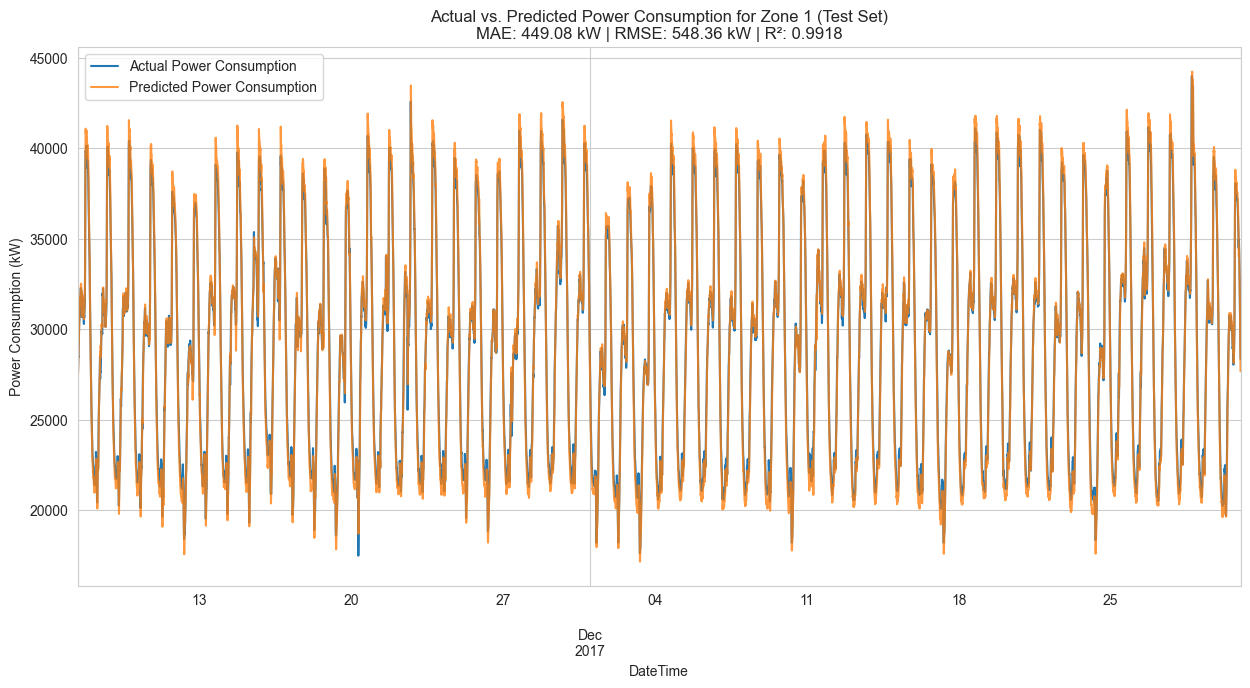

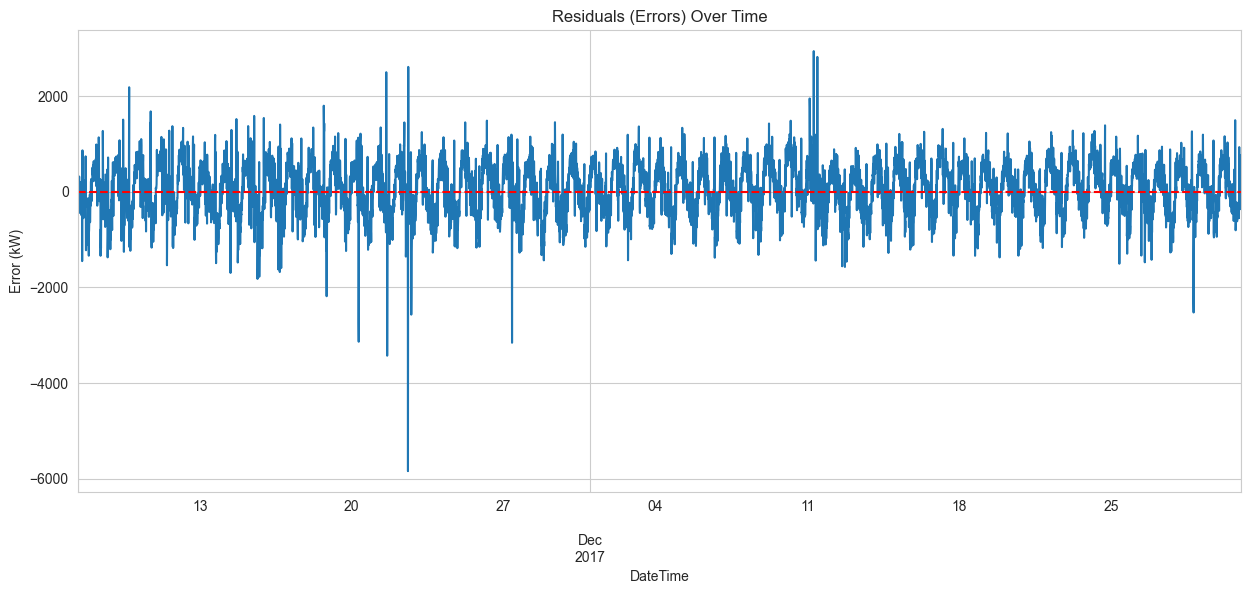

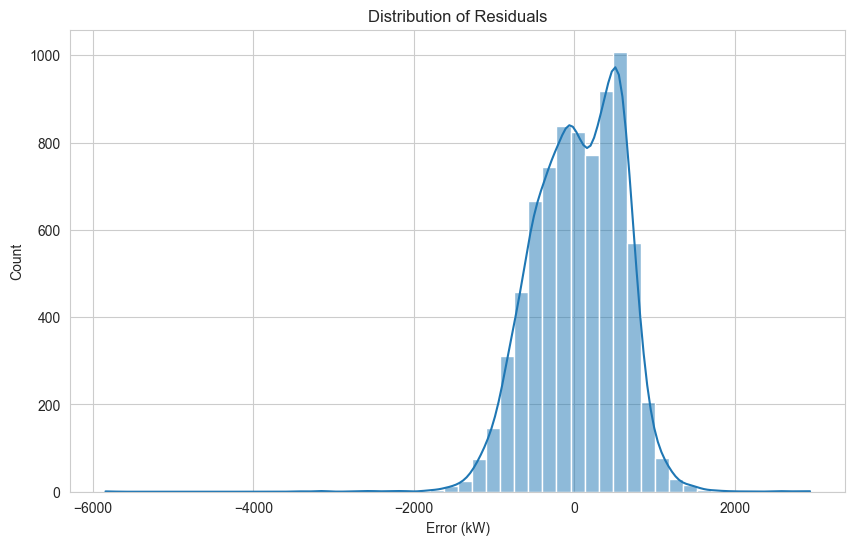


--- Processing Zone 2 (Target: Zone_2__Power_Consumption) ---

--- Sequence Construction Complete ---
Lookback window size: 144 steps (24 hours)
Training sequences shape: (36547, 144, 13), Training labels shape: (36547,)
Validation sequences shape: (7718, 144, 13), Validation labels shape: (7718,)
Test sequences shape: (7719, 144, 13), Test labels shape: (7719,)


--- PyTorch DataLoaders Ready ---
Sample batch shape: X=torch.Size([64, 144, 13]), y=torch.Size([64, 1])
--- Data Preparation Complete ---



--- Model Architecture ---
LSTMForecaster(
  (lstm): LSTM(13, 64, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)
Epoch 1/10 | Train Loss: 0.005321 | Validation Loss: 0.001795
Epoch 2/10 | Train Loss: 0.000768 | Validation Loss: 0.000554
Epoch 3/10 | Train Loss: 0.000499 | Validation Loss: 0.001759
Epoch 4/10 | Train Loss: 0.000404 | Validation Loss: 0.000530
Epoch 5/10 | Train Loss: 0.000336 | Validation Loss: 0.000232
Epoch

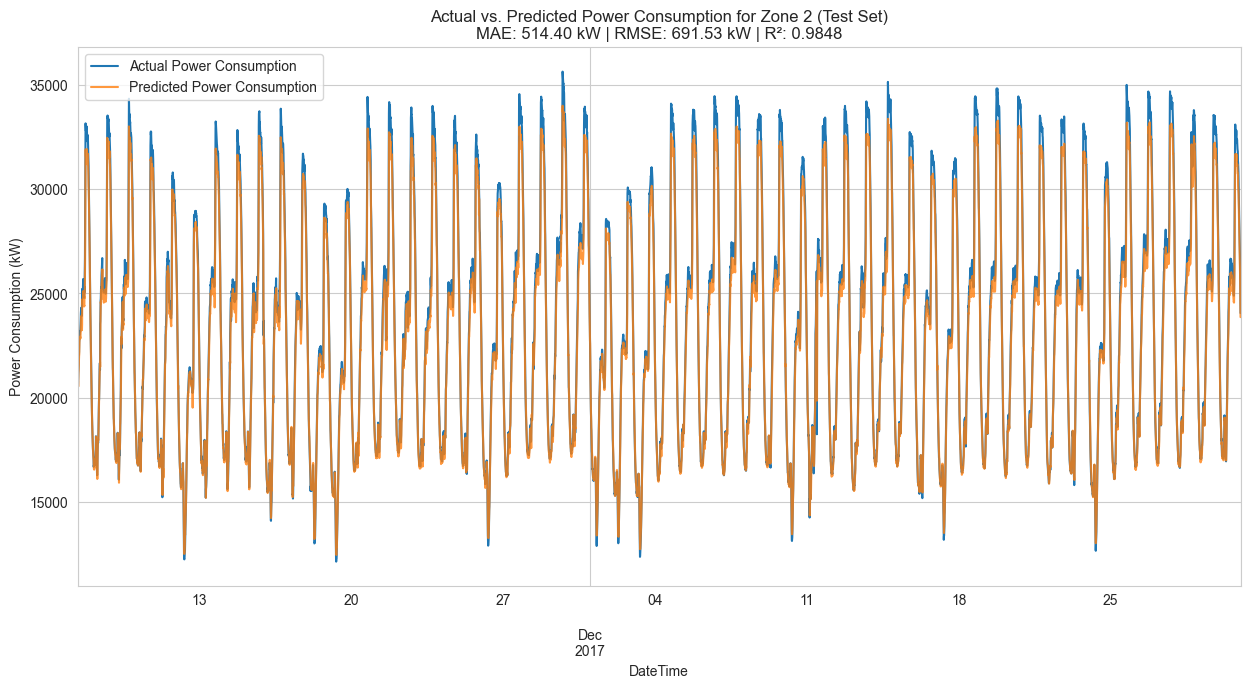

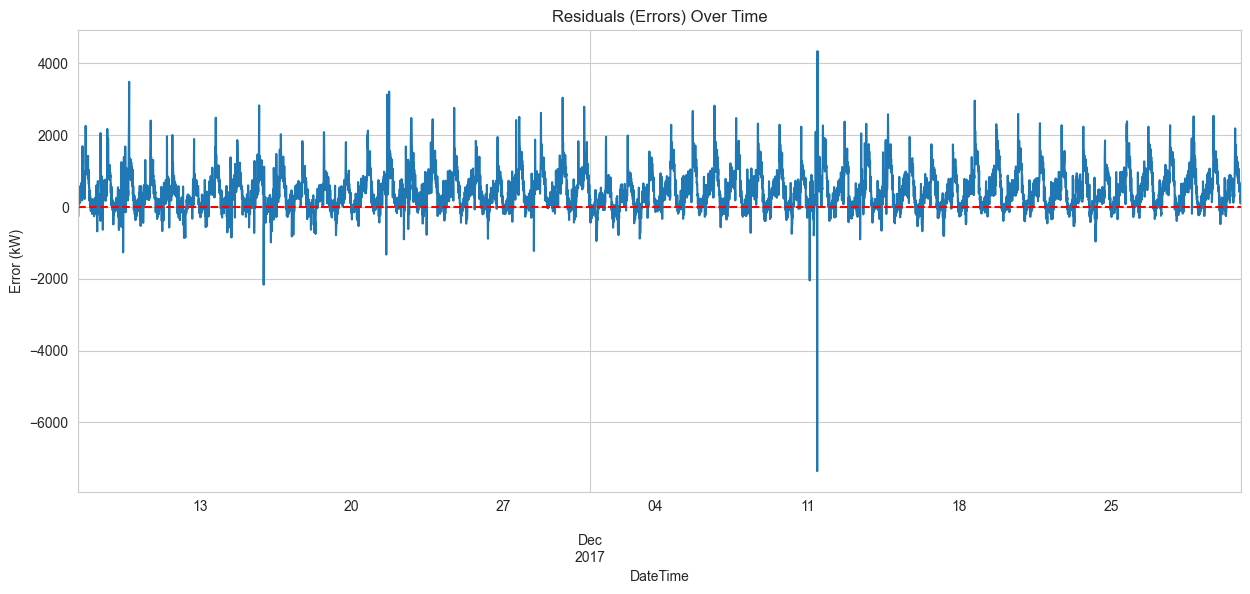

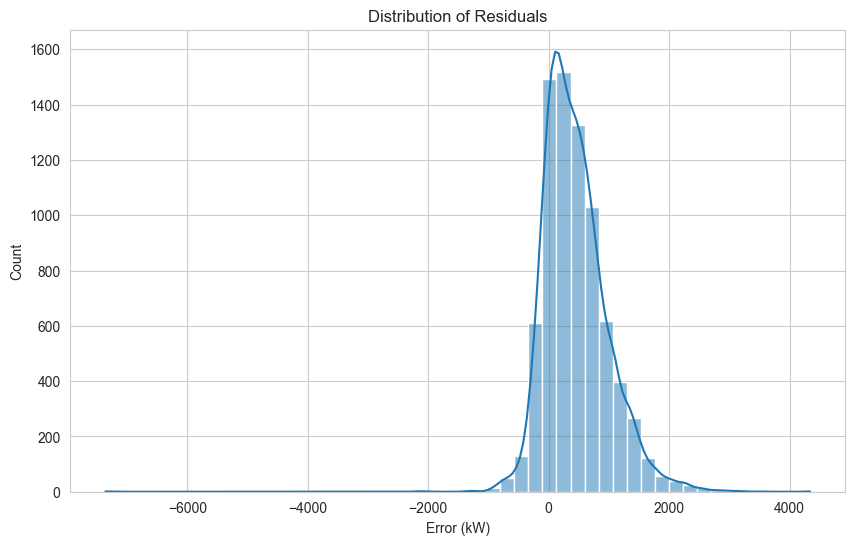


--- Processing Zone 3 (Target: Zone_3__Power_Consumption) ---

--- Sequence Construction Complete ---
Lookback window size: 144 steps (24 hours)
Training sequences shape: (36547, 144, 13), Training labels shape: (36547,)
Validation sequences shape: (7718, 144, 13), Validation labels shape: (7718,)
Test sequences shape: (7719, 144, 13), Test labels shape: (7719,)


--- PyTorch DataLoaders Ready ---
Sample batch shape: X=torch.Size([64, 144, 13]), y=torch.Size([64, 1])
--- Data Preparation Complete ---



--- Model Architecture ---
LSTMForecaster(
  (lstm): LSTM(13, 64, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)
Epoch 1/10 | Train Loss: 0.004538 | Validation Loss: 0.002802
Epoch 2/10 | Train Loss: 0.000673 | Validation Loss: 0.000350
Epoch 3/10 | Train Loss: 0.000469 | Validation Loss: 0.000194
Epoch 4/10 | Train Loss: 0.000331 | Validation Loss: 0.000377
Epoch 5/10 | Train Loss: 0.000279 | Validation Loss: 0.000394
Epoch

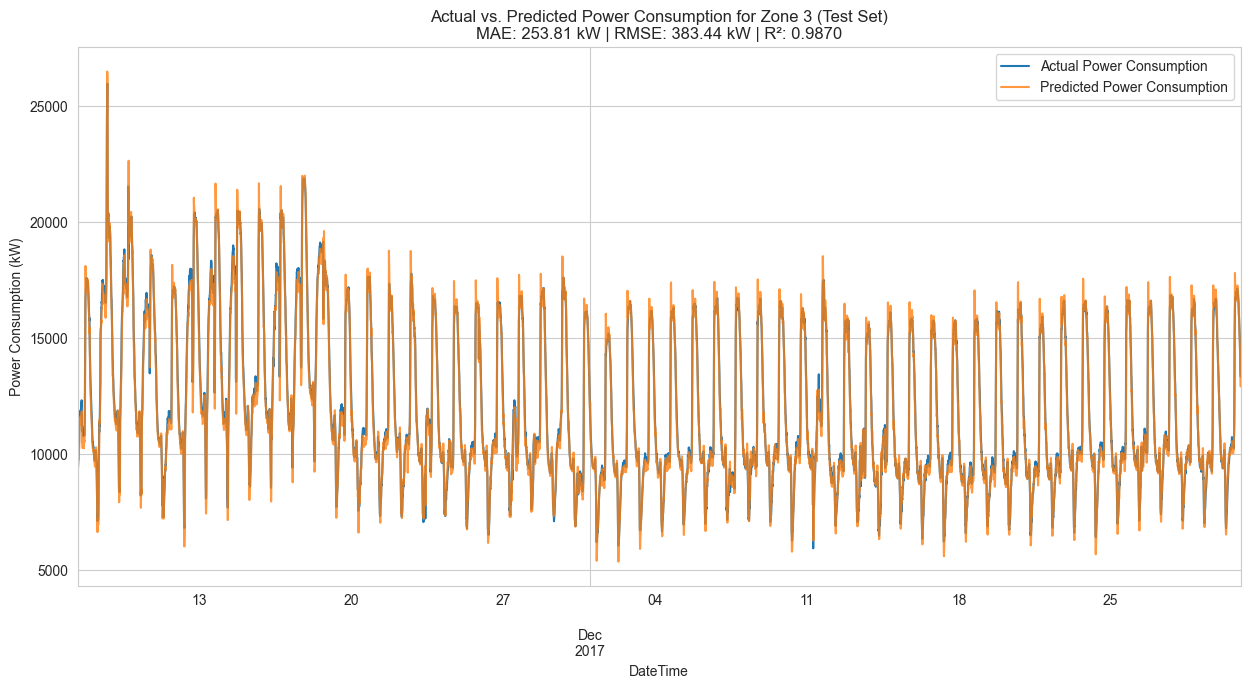

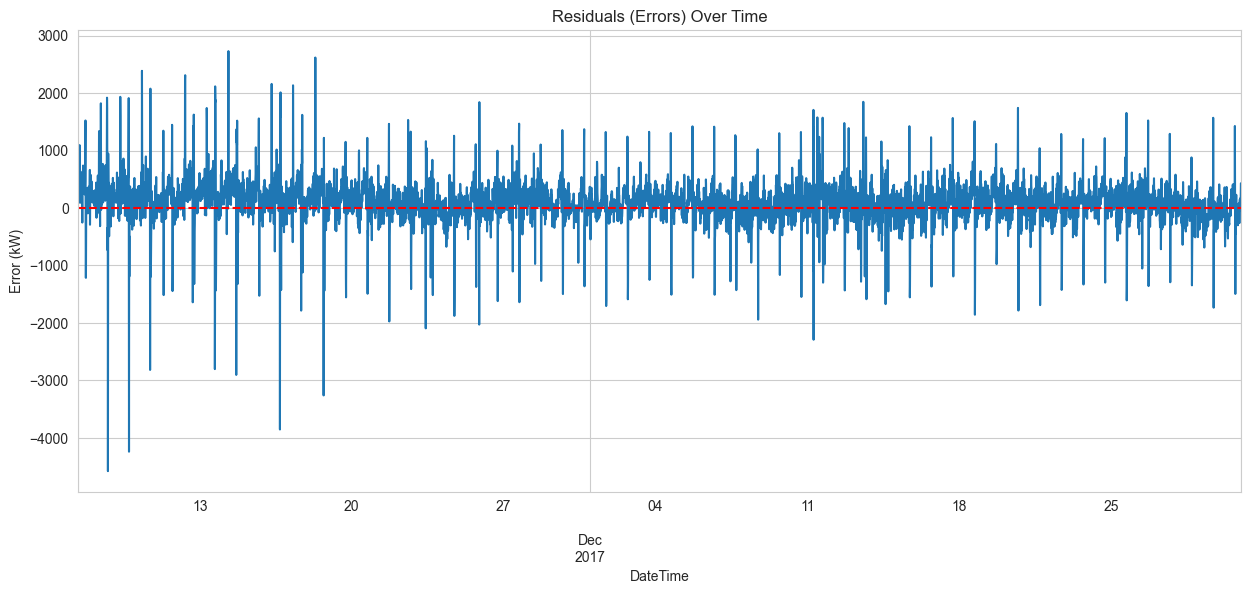

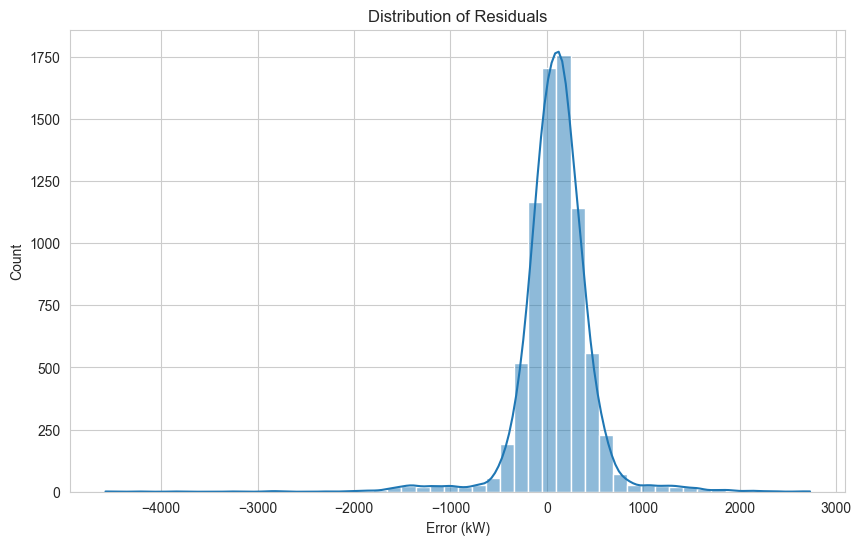

In [32]:
# --- 5. Sequence Construction (Lookback Windows) ---
TARGET_ZONES = {
    'Zone 1': 'Zone_1_Power_Consumption',
    'Zone 2': 'Zone_2__Power_Consumption',
    'Zone 3': 'Zone_3__Power_Consumption'
}

for zone_name, target_col_name in TARGET_ZONES.items():
    print(f"\n{'='*80}")
    print(f"--- Processing {zone_name} (Target: {target_col_name}) ---")
    print(f"{'='*80}\n")

    # --- Sequence Creation ---
    def create_sequences(input_data, lookback_window, target_column_index):
        X, y = [], []
        for i in range(len(input_data) - lookback_window):
            sequence = input_data[i:(i + lookback_window)]
            target = input_data[i + lookback_window, target_column_index]
            X.append(sequence)
            y.append(target)
        return np.array(X), np.array(y)

    LOOKBACK_WINDOW = 144
    # The index of our target column changes for each zone
    TARGET_COL_IDX = train_df.columns.get_loc(target_col_name)

    X_train, y_train = create_sequences(train_scaled, LOOKBACK_WINDOW, TARGET_COL_IDX)
    X_val, y_val = create_sequences(val_scaled, LOOKBACK_WINDOW, TARGET_COL_IDX)
    X_test, y_test = create_sequences(test_scaled, LOOKBACK_WINDOW, TARGET_COL_IDX)

    print("--- Sequence Construction Complete ---")
    print(f"Lookback window size: {LOOKBACK_WINDOW} steps (24 hours)")
    print(f"Training sequences shape: {X_train.shape}, Training labels shape: {y_train.shape}")
    print(f"Validation sequences shape: {X_val.shape}, Validation labels shape: {y_val.shape}")
    print(f"Test sequences shape: {X_test.shape}, Test labels shape: {y_test.shape}")
    print("\n" + "="*80 + "\n")
    # --- 6. Prepare PyTorch DataLoaders ---
    # Convert NumPy arrays to PyTorch Tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # Add dimension for target

    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    # Create TensorDatasets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    # Create DataLoaders
    BATCH_SIZE = 64
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    print("--- PyTorch DataLoaders Ready ---")
    # Example of iterating through a DataLoader
    for batch_X, batch_y in train_loader:
        print(f"Sample batch shape: X={batch_X.shape}, y={batch_y.shape}")
        break
    print("--- Data Preparation Complete ---")
    print("\n" + "="*80 + "\n")
    # --- Model Architecture & Design ---
    class LSTMForecaster(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_rate):
            super(LSTMForecaster, self).__init__()
            self.lstm = nn.LSTM(input_size=input_size,
                                hidden_size=hidden_size,
                                num_layers=num_layers,
                                batch_first=True,
                                dropout=dropout_rate)
            self.linear = nn.Linear(hidden_size, output_size)

        def forward(self, x):
            # LSTM layer
            lstm_out, _ = self.lstm(x)
            # We only need the output of the last time step
            last_time_step_out = lstm_out[:, -1, :]
            # Fully connected layer
            out = self.linear(last_time_step_out)
            return out
        
    # Model hyperparameters
    INPUT_SIZE = X_train.shape[2]  # Number of features
    HIDDEN_SIZE = 64
    NUM_LAYERS = 2
    OUTPUT_SIZE = 1
    DROPOUT_RATE = 0.2

    model = LSTMForecaster(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, DROPOUT_RATE)
    print("\n--- Model Architecture ---")
    print(model)
    print("="*80)
    # --- Training & Experimentation ---
    # Loss function and optimizer
    loss_function = nn.MSELoss()  # Mean Squared Error is common for regression
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    EPOCHS = 10
    train_losses = []
    val_losses = []

    for epoch in range(EPOCHS):
        # Training
        model.train()
        running_loss = 0.0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_X)
            loss = loss_function(output, batch_y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                output = model(batch_X)
                loss = loss_function(output, batch_y)
                running_val_loss += loss.item()

        avg_val_loss = running_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {avg_train_loss:.6f} | Validation Loss: {avg_val_loss:.6f}")

    print("\n--- Training Complete ---")
    # --- 4. Evaluation & Metrics ---
    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            output = model(batch_X)
            predictions.append(output.numpy())
            actuals.append(batch_y.numpy())

    predictions = np.concatenate(predictions).flatten()
    actuals = np.concatenate(actuals).flatten()

    # --- IMPORTANT: Inverse transform to get predictions in original scale ---
    # Create a dummy array with the same number of columns as the original data
    # and fill the prediction column with our scaled predictions.
    dummy_array = np.zeros((len(predictions), len(data.columns)))
    dummy_array[:, TARGET_COL_IDX] = predictions
    predictions_inversed = scaler.inverse_transform(dummy_array)[:, TARGET_COL_IDX]

    # Do the same for the actuals
    dummy_array[:, TARGET_COL_IDX] = actuals
    actuals_inversed = scaler.inverse_transform(dummy_array)[:, TARGET_COL_IDX]

    # Calculate metrics
    mae = metrics.mean_absolute_error(actuals_inversed, predictions_inversed)
    rmse = np.sqrt(metrics.mean_squared_error(actuals_inversed, predictions_inversed))
    r2 = metrics.r2_score(actuals_inversed, predictions_inversed)

    print("\n--- Evaluation on Test Set ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f} kW")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f} kW")
    print(f"R-squared (R²): {r2:.4f}")
    # --- Visualization and Interpretation ---
    results_df = pd.DataFrame({
        'Actual': actuals_inversed,
        'Predicted': predictions_inversed
    }, index=test_df.index[LOOKBACK_WINDOW:])

    # Create a new figure for each zone's plots. This allows this block
    # to be run in a separate cell for each zone.
    fig_zone, axes_zone = plt.subplots(1, 3, figsize=(24, 7))
    fig_zone.suptitle(f'Model Performance and Residual Analysis for {zone_name}', fontsize=18, y=1.03)

    # Plot 1: Actual vs. Predicted
    results_df['Actual'].plot(ax=axes_zone[0], label='Actual Power Consumption')
    results_df['Predicted'].plot(ax=axes_zone[0], label='Predicted Power Consumption', alpha=0.8)
    title_text = (f'Actual vs. Predicted\n'
                  f'MAE: {mae:.2f} kW | RMSE: {rmse:.2f} kW | R²: {r2:.4f}')
    axes_zone[0].set_title(title_text)
    axes_zone[0].set_ylabel('Power Consumption (kW)')
    axes_zone[0].legend()

    # Plot 2: Residuals Over Time
    results_df['Residuals'] = results_df['Actual'] - results_df['Predicted']
    results_df['Residuals'].plot(ax=axes_zone[1])
    axes_zone[1].set_title('Residuals (Errors) Over Time')
    axes_zone[1].set_ylabel('Error (kW)')
    axes_zone[1].axhline(0, color='r', linestyle='--')

    # Plot 3: Distribution of Residuals
    sns.histplot(results_df['Residuals'], bins=50, kde=True, ax=axes_zone[2])
    axes_zone[2].set_title('Distribution of Residuals')
    axes_zone[2].set_xlabel('Error (kW)')
    
    # Show the plots for the current zone
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
